# Set Up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import mne
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator, Scaler,
                          cross_val_multiscore, LinearModel, get_coef,
                          Vectorizer, CSP)
from glob import glob
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci

from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)
from mne import Epochs, pick_types, events_from_annotations

In [2]:
# Defining the Montage

ch_pos = {'EEG Fp1-Vref': [-0.02892644, 0.08246248, -0.00686883],
          'EEG Fp2-Vref': [0.02935449, 0.08342431, -0.00695727],
          'EEG Fz-Vref': [0.00030679, 0.05749775, 0.06530994],
          'EEG F3-Vref': [-0.04937287, 0.05219057, 0.04146064],
          'EEG F4-Vref': [0.05093767, 0.05336348, 0.04010653],
          'EEG F7-Vref': [-0.06904496, 0.04173805, -0.01122204],
          'EEG F8-Vref': [0.07177697, 0.04365169, -0.01179199],
          'EEG Cz-Vref': [0.00039395, -0.0090081, 0.09850636],
          'EEG C3-Vref': [-0.06422518, -0.01143008, 0.06324241],
          'EEG C4-Vref': [0.06595447, -0.01071135, 0.0624779],
          'EEG T3-Vref': [-0.08270225, -0.01574103, -0.009184],
          'EEG T4-Vref': [0.08360512, -0.01475994, -0.0093255],
          'EEG T5-Vref': [-0.07117872, -0.07217947, -0.00244389],
          'EEG T6-Vref': [0.07178935, -0.07180173, -0.00249597],
          'EEG Pz-Vref': [0.00031907, -0.07970895, 0.08118295],
          'EEG P3-Vref': [-0.05208847, -0.07742209, 0.05497033],
          'EEG P4-Vref': [0.05470177, -0.07719843, 0.05558057],
          'EEG O1-Vref': [-0.02890355, -0.1104998, 0.00868578],
          'EEG O2-Vref': [0.02932531, -0.11021188, 0.00864746],
          'EEG A1-Vref': [-0.08458405, -0.02455653, -0.06680753],
          'EEG A2-Vref': [0.08430674, -0.02457579, -0.06685175],
             #'EEG None': [0, 0, 0],
          'Trigger': [0, 0, 0]

          }





coord_frame = 'unknown'
nasion = ([8.15612724e-06, 8.53062123e-02, -3.92899320e-02])
lpa = ([-0.08458405, -0.0196432, -0.04715421])
rpa = ([0.08430674, -0.01966246, -0.04719843])
hsp = None
hpi = None


from importlib.machinery import SourceFileLoader
import matplotlib.pyplot as plt

dsi_24_montage = mne.channels.make_dig_montage(ch_pos=ch_pos, nasion=nasion, lpa=lpa, rpa=rpa, hsp=hsp, hpi=hpi)



In [3]:
#mne.viz.plot_montage(dsi_24_montage, scale_factor=50, show_names=None, kind='topomap', show=True, sphere=None, verbose=None)

# Read Data

In [4]:
# raw_rechts1=mne.io.read_raw_edf("9thRun_rechts_M_raw.edf", preload=True)
# raw_rechts1.set_eeg_reference(ref_channels=['EEG A1-Vref', 'EEG A2-Vref'])
# raw_rechts1.load_data().filter(2, 35)

# #raw_rechts1.pick('Trigger')._data = raw_rechts1.pick('Trigger')._data*2
# #raw_rechts1.pick('Trigger')._data*2

# raw_rechts1.plot(ch_name='Trigger')

In [5]:
#einlesen

#raw_links = mne.io.read_raw_edf("5thRun_links_M_raw.edf", preload=True)
#raw_rechts = mne.io.read_raw_edf("5thRun_rechts_M_raw.edf", preload=True)

raw_links = (mne.io.read_raw_edf("6thRun_left_filtered.edf", preload=True))
#raw_rechts = mne.io.read_raw_edf("6thRun_right_filtered.edf", preload=True)


#raw_links = mne.io.read_raw_edf("6thRun_left_raw.edf", preload=True)
#raw_rechts = mne.io.read_raw_edf("6thRun_right_raw.edf", preload=True)

raw_rechts1 = mne.io.read_raw_edf("9thRun_rechts_M_raw.edf", preload=True)
#raw_links = mne.io.read_raw_edf("links_1_1_M_filtered.edf", preload=True)

raw_rechts = mne.io.read_raw_edf("luckyRun_right_M_raw.edf", preload=True)
#raw_rechts = mne.io.read_raw_edf("luckyRun_right_M_filtered.edf", preload=True)


#print(raw_rechts.ch_names)

Extracting EDF parameters from C:\Users\naomi\6thRun_left_filtered.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 613199  =      0.000 ...  2043.997 secs...
Extracting EDF parameters from C:\Users\naomi\9thRun_rechts_M_raw.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 608399  =      0.000 ...  2027.997 secs...


C:\Users\naomi\AppData\Local\Temp/ipykernel_8144/53112237.py:6: RuntimeWarning: Omitted 24 annotation(s) that were outside data range.
  raw_links = (mne.io.read_raw_edf("6thRun_left_filtered.edf", preload=True))


Extracting EDF parameters from C:\Users\naomi\luckyRun_right_M_raw.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 610349  =      0.000 ...  2034.497 secs...


C:\Users\naomi\AppData\Local\Temp/ipykernel_8144/53112237.py:13: RuntimeWarning: Omitted 44 annotation(s) that were outside data range.
  raw_rechts1 = mne.io.read_raw_edf("9thRun_rechts_M_raw.edf", preload=True)
C:\Users\naomi\AppData\Local\Temp/ipykernel_8144/53112237.py:16: RuntimeWarning: Omitted 25 annotation(s) that were outside data range.
  raw_rechts = mne.io.read_raw_edf("luckyRun_right_M_raw.edf", preload=True)


In [6]:
#re-reference
raw_rechts.set_eeg_reference(ref_channels=['EEG A1-Vref', 'EEG A2-Vref'])
raw_rechts1.set_eeg_reference(ref_channels=['EEG A1-Vref', 'EEG A2-Vref'])
raw_links.set_eeg_reference(ref_channels=['EEG A1-Vref', 'EEG A2-Vref'])


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


<RawEDF | 6thRun_left_filtered.edf, 22 x 613200 (2044.0 s), ~102.9 MB, data loaded>

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 495 samples (1.650 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 495 samples (1.650 sec)



[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 495 samples (1.650 sec)



[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using matplotlib as 2D backend.


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.4s finished
C:\Users\naomi\AppData\Local\Temp/ipykernel_8144/130925425.py:7: RuntimeWarning: Not setting position of 1 stim channel found in montage:
['Trigger']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw_rechts.set_montage(dsi_24_montage)
C:\Users\naomi\AppData\Local\Temp/ipykernel_8144/130925425.py:8: RuntimeWarning: Not setting position of 1 stim channel found in montage:
['Trigger']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw_rechts1.set_montage(dsi_24_montage)
C:\Users\naomi\AppData\Local\Temp/ipykernel_8144/130925425.py:9: RuntimeWarning: Not setting position of 1 stim channel found in montage:
['Trigger']
Consider setting the channel types 

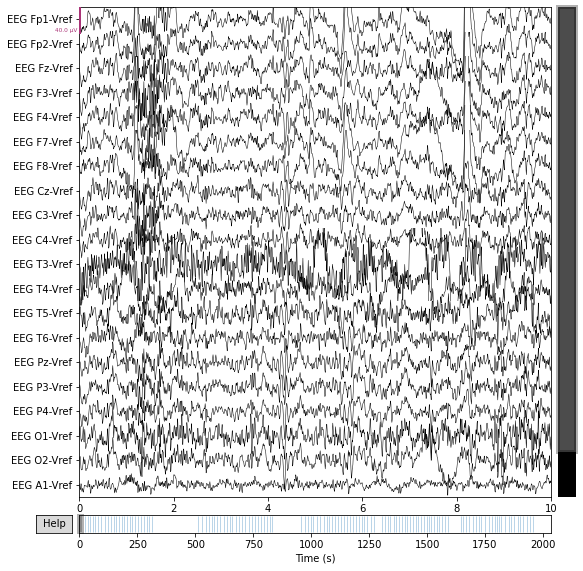

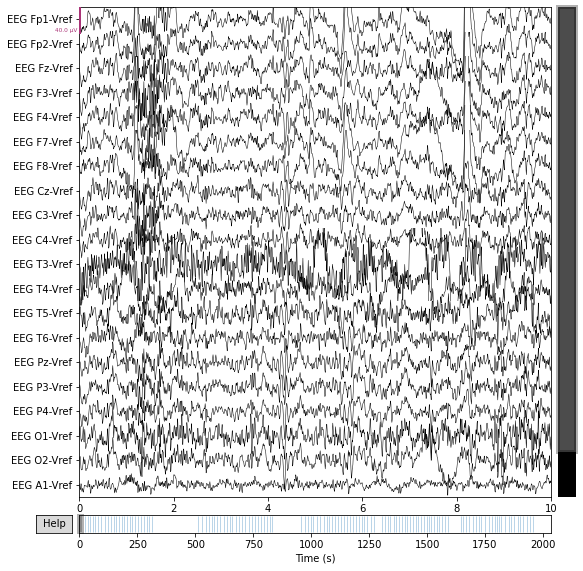

In [7]:
#filter
raw_links.load_data().filter(2, 35)
raw_rechts.load_data().filter(2, 35)
raw_rechts1.load_data().filter(2, 35)

# setting the dsi montage to the file => for ica
raw_rechts.set_montage(dsi_24_montage) 
raw_rechts1.set_montage(dsi_24_montage) 
raw_links.set_montage(dsi_24_montage) 


# # Interpolate
# raw_rechts = raw_rechts.interpolate_bads(reset_bads=True) 
# raw_links = raw_rechts.interpolate_bads(reset_bads=True) 


raw_rechts.plot()

# ICA
https://towardsdatascience.com/artefact-correction-with-ica-53afb63ad300

### Create and Save ICA 

In [8]:
# method = 'fastica'

# # set up and fit the ICA
# ica = mne.preprocessing.ICA(n_components=20, method=method, random_state=23, max_iter=800)
# ica.fit(raw_rechts)
# #print(ica)

In [9]:
# ica.exclude = []
# # find which ICs match the EOG pattern
# eog_indices, eog_scores = ica.find_bads_eog(raw_rechts, ch_name=['EEG Fp1-Vref','EEG F8-Vref'])
# ica.exclude = eog_indices

# # barplot of ICA component "EOG match" scores
# ica.plot_scores(eog_scores)

# # plot diagnostics
# ica.plot_properties(raw_rechts, picks=eog_indices)

# # plot ICs applied to raw data, with EOG matches highlighted
# ica.plot_sources(raw_rechts, show_scrollbars=False)

# # plot ICs applied to the averaged EOG epochs, with EOG matches highlighted
# #ica.plot_sources(eog_evoked)

In [10]:
#ica.save("test-ica.fif")

### Using saved ICA  

In [11]:
ica = mne.preprocessing.read_ica("75_prozent-ica.fif") #bereits angewandt und gespeichert
ica = mne.preprocessing.read_ica("./Naomi_Projekt/finalized_model_prob_svc_7261%_ohne_ica.sav")

Reading 75_prozent-ica.fif ...
Now restoring ICA solution ...
Ready.


In [12]:
ica.apply(raw_rechts)
ica.apply(raw_rechts1)
ica.apply(raw_links)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 1 ICA component
    Projecting back using 21 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 1 ICA component
    Projecting back using 21 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 1 ICA component
    Projecting back using 21 PCA components


<RawEDF | 6thRun_left_filtered.edf, 22 x 613200 (2044.0 s), ~103.0 MB, data loaded>

# Events, Epoching

150 events found
Event IDs: [2]
150 events found
Event IDs: [1]
150 events found
Event IDs: [1]


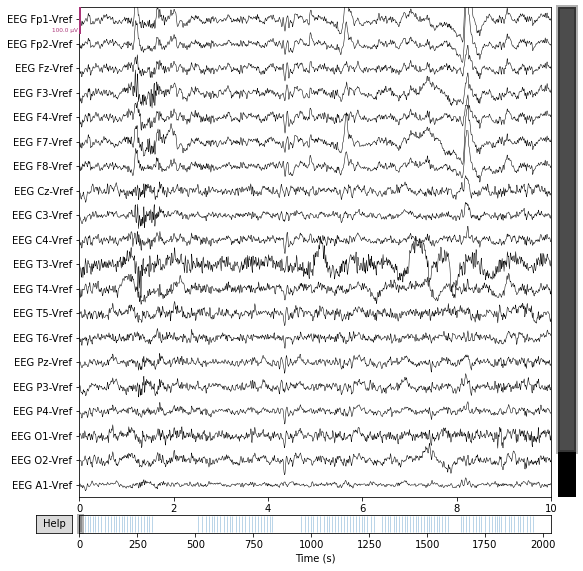

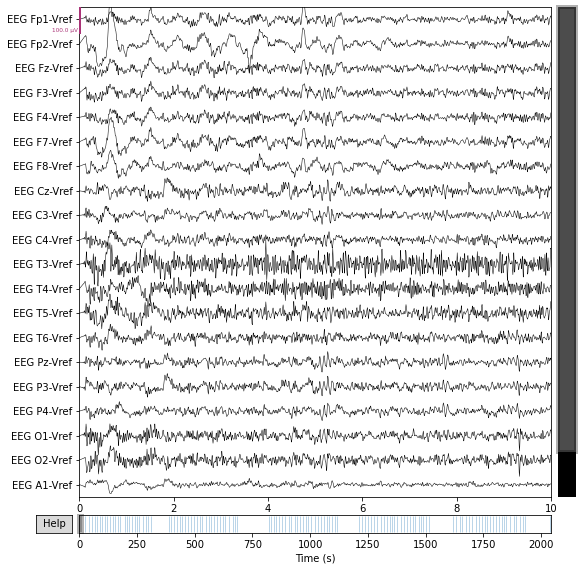

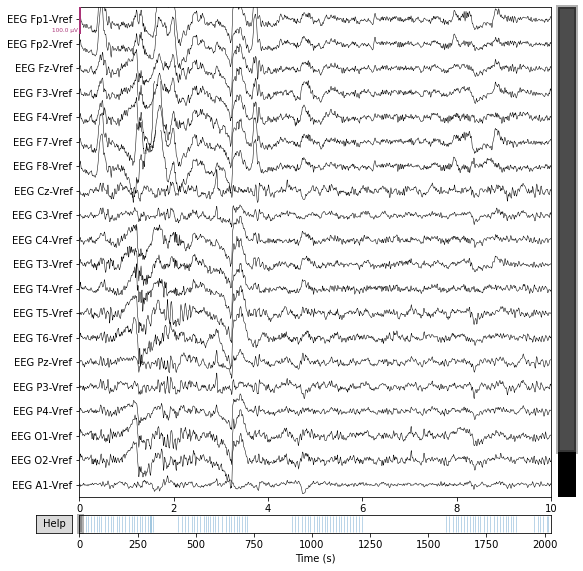

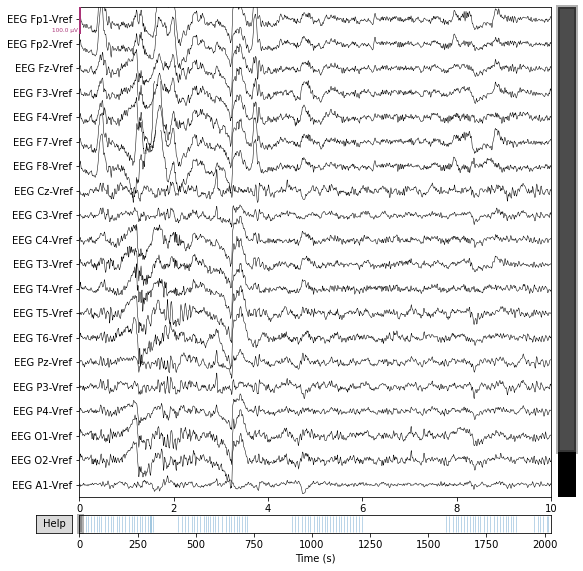

In [13]:
#Events suchen


events_links = mne.find_events(raw_links, stim_channel='Trigger')#, min_duration=0.006)

events_rechts = mne.find_events(raw_rechts, stim_channel='Trigger', min_duration=0.006)

events_rechts1 = mne.find_events(raw_rechts1, stim_channel='Trigger', min_duration=0.006)

#raw_rechts.plot()

events_gesamt=np.vstack([events_links, events_rechts, events_rechts1])
#print(events_gesamt)





#mne.viz.plot_events(events_gesamt, raw_links.info['sfreq'], raw_links.first_samp, color
#                      event_id_gesamt)

event_id_links = {'Left': 2}
color_links = {2: 'red'}


event_id_rechts = {'Right': 1}
color_links = {1: 'green'}
event_id_rechts1 = {'Right': 1}
color_links = {1: 'green'}

#events_gesamt = mne.find_events(raw_gesamt, stim_channel='Trigger', min_duration=0.006)

event_id_gesamt = {'Right': 1, 'Left': 2}
color_gesamt = {1: 'green', 2: 'red'}


#mne.viz.plot_events(events_gesamt, event_id = event_id_gesamt)




#plot results again, this time with some events and scaling. 
raw_rechts.plot(events=events_rechts, duration=10.0, scalings=dict(eeg=0.00005), color='k', event_color='r')
#plot results again, this time with some events and scaling. 
raw_links.plot(events=events_links, duration=10.0, scalings=dict(eeg=0.00005), color='k', event_color='r')
raw_rechts1.plot(events=events_rechts1, duration=10.0, scalings=dict(eeg=0.00005), color='k', event_color='r')


#raw_gesamt.plot(events=events_gesamt, duration=10.0, scalings=dict(eeg=0.00005), color='k', event_color='r')


In [14]:
# Read  & plot epochs

baseline=(-0.2,0)

epochs_links = mne.Epochs(raw_links, events_links, event_id_links, tmin=-0.2,
                          tmax=0.8, baseline=baseline,  
                          picks='all', preload=True)

#print(type(epochs_links))
#print(epochs_links)

epochs_rechts = mne.Epochs(raw_rechts, events_rechts, event_id_rechts, tmin=-0.2,
                           tmax=0.8, baseline=baseline,
                           picks='all', preload=True)


epochs_rechts1 = mne.Epochs(raw_rechts1, events_rechts1, event_id_rechts1, tmin=-0.2,
                           tmax=0.8, baseline=baseline,
                           picks='all', preload=True)

#mne.concatenate_Epochs()
#concatenate!!
print()
print()
print()
#print(epochs_rechts)


# epochs_gesamt = mne.Epochs(raw_links, events_gesamt, event_id_gesamt, 
#                             tmin=-0.2,  tmax=0.8, baseline=baseline,
#                             picks='all', preload=True)



#epochs_gesamt.plot()
#epochs_rechts.plot()
#epochs_links.plot()
#print(epochs_links)
#print(epochs_rechts)


data_links = epochs_links.get_data()  #Get data in the given range
#print(data_links)

data_rechts = epochs_rechts.get_data()  

#data_rechts1 = epochs_rechts1.get_data() 

#print(data_rechts)
#print(type(data_rechts))

#data_gesamt=data_links+data_rechts+data_rechts1
#print(data_gesamt)





Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 150 events and 301 original time points ...
0 bad epochs dropped
Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 150 events and 301 original time points ...
0 bad epochs dropped
Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 150 events and 301 original time points ...
0 bad epochs dropped





In [15]:
#raw_gesamt = mne.io.concatenate_raws([raw_rechts, raw_links, raw_rechts1],  preload = True, events_list=[events_rechts, events_links, events_rechts1], on_mismatch='ignore')

# epochs_gesamt = mne.Epochs(raw_gesamt, events_gesamt, event_id_gesamt, 
#                             tmin=-0.2,  tmax=0.8, baseline=baseline,
#                             picks='all', preload=True)

epochs_gesamt = mne.concatenate_epochs(epochs_list = [epochs_links, epochs_rechts, epochs_rechts1])


# print(raw_gesamt)

Not setting metadata
450 matching events found
Applying baseline correction (mode: mean)


C:\Users\naomi\AppData\Local\Temp/ipykernel_8144/2469108902.py:7: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_gesamt = mne.concatenate_epochs(epochs_list = [epochs_links, epochs_rechts, epochs_rechts1])


# Preprocessing

https://github.com/xiangzhang1015/Deep-Learning-for-BCI/blob/master/tutorial/2-Preprocessing.ipynb

In [16]:
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)

In [17]:
epochs_list = [epochs_gesamt[k] for k in event_id_gesamt]
mne.epochs.equalize_epoch_counts(epochs_list) # damit von beiden Tasks gleich viele Daten - DEshalb 150 Epochs dropped
# #print(epochs_list)

n_times = len(epochs_gesamt.times)
#print(n_times)

Dropped 150 epochs: 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299
Dropped 0 epochs: 


In [42]:
C4 = mne.pick_types(epochs_gesamt.info, eeg=True, exclude=[
'EEG Fp1-Vref', 
'EEG Fp2-Vref', 
'EEG Fz-Vref', 
'EEG F3-Vref', 
'EEG F4-Vref', 
'EEG F7-Vref', 
'EEG F8-Vref', 
'EEG Cz-Vref', 
'EEG C3-Vref', 
#'EEG C4-Vref', 
'EEG T3-Vref', 
'EEG T4-Vref', 
'EEG T5-Vref', 
'EEG T6-Vref', 
'EEG Pz-Vref', 
'EEG P3-Vref', 
'EEG P4-Vref', 
'EEG O1-Vref', 
'EEG O2-Vref', 
'EEG A1-Vref', 
'EEG A2-Vref', 
'Trigger'
])

Cz = mne.pick_types(epochs_gesamt.info, eeg=True, exclude=['EEG Fp1-Vref', 
'EEG Fp2-Vref', 
'EEG Fz-Vref', 
'EEG F3-Vref', 
'EEG F4-Vref', 
'EEG F7-Vref', 
'EEG F8-Vref', 
#'EEG Cz-Vref', 
'EEG C3-Vref', 
'EEG C4-Vref', 
'EEG T3-Vref', 
'EEG T4-Vref', 
'EEG T5-Vref', 
'EEG T6-Vref', 
'EEG Pz-Vref', 
'EEG P3-Vref', 
'EEG P4-Vref', 
'EEG O1-Vref', 
'EEG O2-Vref', 
'EEG A1-Vref', 
'EEG A2-Vref', 
'Trigger'
])


C3 = mne.pick_types(epochs_gesamt.info, eeg=True, exclude=['EEG Fp1-Vref', 
'EEG Fp2-Vref', 
'EEG Fz-Vref', 
'EEG F3-Vref', 
'EEG F4-Vref', 
'EEG F7-Vref', 
'EEG F8-Vref', 
'EEG Cz-Vref', 
#'EEG C3-Vref', 
'EEG C4-Vref', 
'EEG T3-Vref', 
'EEG T4-Vref', 
'EEG T5-Vref', 
'EEG T6-Vref', 
'EEG Pz-Vref', 
'EEG P3-Vref', 
'EEG P4-Vref', 
'EEG O1-Vref', 
'EEG O2-Vref', 
'EEG A1-Vref', 
'EEG A2-Vref', 
'Trigger'
])


C3_data =[e.get_data()[:, C3, :] for e in epochs_list]
C4_data =[e.get_data()[:, C4, :] for e in epochs_list]
Cz_data =[e.get_data()[:, Cz, :] for e in epochs_list]


#print(C3_data)

C3_minus_Cz_data = []
C4_minus_Cz_data = []
C4_minus_Cz_C3_data = []


for i in range (len(C3_data)):
    val = C3_data[i]-Cz_data[i]
    C3_minus_Cz_data.append(val)
    
for i in range (len(C4_data)):
    val = C4_data[i]-Cz_data[i]
    C4_minus_Cz_data.append(val)


for i in range (len(C4_minus_Cz_data)):
    val = C4_minus_Cz_data[i]-C3_minus_Cz_data[i]
    C4_minus_Cz_C3_data.append(val)
    
    
print(C4_minus_Cz_C3_data)    

print(range (len(C3_data)))
print(range (len(C3_minus_Cz_data)))
print(C4_minus_Cz_C3_data)
print(len(C4_minus_Cz_C3_data))


#C3_data_ohne_Cz = C3_data - Cz_data
# C3_data_ohne_Cz
# svm_data = 
                     
#print(C3_data) 

[array([[[-4.59581351e-06, -1.10261948e-05, -1.56503910e-05, ...,
         -3.84491275e-06, -3.49479553e-06, -2.96809229e-06]],

       [[ 2.78561899e-06,  6.27385756e-06,  8.19459352e-06, ...,
          9.84354159e-08, -1.18689657e-06, -2.31646398e-06]],

       [[ 9.01997900e-06,  1.58325875e-05,  2.08277748e-05, ...,
          1.15129804e-05,  1.20272347e-05,  1.32469823e-05]],

       ...,

       [[ 2.81266536e-06,  3.63541869e-06,  3.41037895e-06, ...,
          4.63156135e-06,  3.97058808e-06,  3.83442331e-06]],

       [[-1.98909286e-05, -2.06610004e-05, -2.00274998e-05, ...,
          7.42549760e-06,  1.05244180e-05,  1.29339892e-05]],

       [[ 6.75552293e-06,  1.35447038e-05,  1.99921775e-05, ...,
          7.34312816e-06,  7.53364187e-06,  7.19078632e-06]]]), array([[[ 9.62337514e-06,  4.74416290e-06, -1.88998667e-07, ...,
         -3.62592303e-06, -2.30317875e-06, -2.55134149e-06]],

       [[-1.87102057e-05, -2.35026001e-05, -2.47236963e-05, ...,
          4.07415940e-08

In [19]:
X = C4_minus_Cz_C3_data #[e.get_data()[:, data_picks, :] for e in epochs_list]
y = [k * np.ones(len(this_X)) for k, this_X in enumerate(X)]

X = np.concatenate(X)
y = np.concatenate(y)

print(X)

print (y.shape)
# print (z)

[[[-4.59581351e-06 -1.10261948e-05 -1.56503910e-05 ... -3.84491275e-06
   -3.49479553e-06 -2.96809229e-06]]

 [[ 2.78561899e-06  6.27385756e-06  8.19459352e-06 ...  9.84354159e-08
   -1.18689657e-06 -2.31646398e-06]]

 [[ 9.01997900e-06  1.58325875e-05  2.08277748e-05 ...  1.15129804e-05
    1.20272347e-05  1.32469823e-05]]

 ...

 [[ 8.09403393e-06  1.68488145e-05  2.46126010e-05 ...  7.43919775e-06
    1.05232380e-05  1.04037334e-05]]

 [[-1.19947059e-05 -1.06745168e-05 -7.71302321e-06 ...  1.32845223e-06
    2.18352810e-06  3.83605506e-06]]

 [[ 1.36141739e-05  8.03401754e-06  2.17190016e-06 ...  1.37356983e-05
    1.50987969e-05  1.50630691e-05]]]
(300,)


### Spliting training and test data

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)



# scikit-learn expects 2d num arrays for the training dataset for a fit function. 
#The dataset passed is a 3d array => need to reshape the array into a 2d.
X_train_2d = X_train.reshape(len(X_train), -1) 
X_train_2d = X_train_2d / np.std(X_train_2d)

X_test_2d = X_test.reshape(len(X_test), -1) 
X_test_2d = X_test_2d / np.std(X_test_2d)


### Normalisierung

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler3 = MinMaxScaler().fit(X_train_2d)
train_fea_norm3 = scaler3.transform(X_train_2d)
test_fea_norm3 = scaler3.transform(X_test_2d)

print('After normalization, the shape of training feature:', train_fea_norm3.shape,
      '\nAfter normalization, the shape of test feature:', test_fea_norm3.shape)

After normalization, the shape of training feature: (240, 301) 
After normalization, the shape of test feature: (60, 301)


### Klassifizierung

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, ShuffleSplit

In [23]:
#X_2d = X.reshape(len(X), -1)
#X_2d = X_2d / np.std(X_2d)
#scores_full = cross_val_score(clf, X_2d, y, cv=cv, n_jobs=1)
#print ("Classification score: %s (std. %s)" % (np.mean(scores_full), np.std(scores_full)))

In [24]:
from sklearn.svm import SVC  # noqa
from sklearn.model_selection import ShuffleSplit  # noqa
from mne.decoding import CSP  # noqa

labels = epochs_gesamt.events[:, -1]

n_components = 3  # pick some components
svc = SVC(C=7, kernel='rbf')
svc1 = SVC(C=7, kernel='rbf') #(C=0.1, kernel='linear')
svc2 = SVC(C=7, kernel='rbf')
csp = CSP(n_components=n_components)

epochs_data = X
scores = []


# print(X_train.shape)
# print( y_train.shape)
# print(X_test.shape)
# print(y_test.shape)
# # print(X_train)
# # print(X_test)
# print(y_train)
# print(y_test)



# fit classifier
svc.fit(X_train_2d, y_train) #dann als Variable abspeichern - und dann in logfile
svc_pred = svc.predict(X_test_2d)

acc = svc.score(X_test_2d, y_test)
print("SVC Accuracy score is:", acc)

# MinMax Scaler
svc1.fit(train_fea_norm3, y_train)
svc1_pred = svc1.predict( test_fea_norm3)

acc1 = svc1.score(test_fea_norm3, y_test)
print("SVC1 Accuracy score is:", acc1)



#scores.append(svc.score(X_test_2d, y_test))
#Printing the results
#class_balance = np.mean(labels == labels[0])
#class_balance = max(class_balance, 1. - class_balance)
#print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
#                                                          class_balance))


SVC Accuracy score is: 0.5
SVC1 Accuracy score is: 0.5833333333333334


In [40]:
print(svc_pred) # vom letzten datenpaket

print(len(test_fea_norm3[0]))
print(len(X_test_2d))

[1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
301
60


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay,RocCurveDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score


cm = confusion_matrix(y_test, svc_pred)

print()
print("Confusion Matrix")
print(cm)

ConfusionMatrixDisplay.from_predictions(y_test, svc_pred)




Confusion Matrix
[[15 18]
 [12 15]]


In [26]:
# MinMax Scaler
cm = confusion_matrix(y_test, svc1_pred)

print()
print("Confusion Matrix")
print(cm)

ConfusionMatrixDisplay.from_predictions(y_test, svc1_pred)





Confusion Matrix
[[19 14]
 [11 16]]


## Grid Search for the best parameters

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
grid_values = {'C':[0.2,0.1,0.5,0.4,0.3,0.6,0.7,0.8,0.9,1,5,7], 'kernel':['linear', 'rbf', 'sigmoid', 'poly'] }
grid_classifier = GridSearchCV(svc, param_grid = grid_values, scoring = 'accuracy')
grid_classifier.fit(X_train_2d, y_train)

best_accuracy = grid_classifier.best_score_
best_param = grid_classifier.best_params_

print('Best Accuracy : ', best_accuracy*100)
print('Best Parameters : ',best_param)
print('')
print('----------------')
print('')



Best Accuracy :  59.16666666666666
Best Parameters :  {'C': 0.4, 'kernel': 'rbf'}

----------------



### Save trained modell

In [29]:
# learned_model = svc.fit(X_train_2d, y_train)

# print(learned_model)

In [30]:
# import pickle
# filename ='finalized_model_svc1_76%.sav'

# with open(filename, "wb") as file:
#     pickle.dump(svc1, file)

### Load trained modell

In [31]:
import pickle

filename ='finalized_model.sav'
loaded_model = pickle.load(open(filename, "rb"))

#für svc
result = loaded_model.predict(X_test_2d) # Vorhersage => vergleichen mit Lösung ob richtig mit Durchgang
print(result)

result2 = loaded_model.score(X_test_2d, y_test) # Score => wenn mehrere => automatischen Klassifikationsgenauigkeit
print(result2)

[1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
0.95


In [32]:
import pickle

filename ='finalized_model_svc1_76%.sav'
loaded_model = pickle.load(open(filename, "rb"))


#für svc1
result = loaded_model.predict(test_fea_norm3) # Vorhersage => vergleichen mit Lösung ob richtig mit Durchgang
print(result)

result2 = loaded_model.score(test_fea_norm3, y_test) # Score => wenn mehrere => automatischen Klassifikationsgenauigkeit
print(result2)



[1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
0.9166666666666666


# Preprocessing for live Data


In [33]:
raw_test = mne.io.read_raw_edf("rechts_0211_3_M_raw.edf", preload=True)
ica.apply(raw_test)


epochs_test = mne.Epochs(raw_test, events_rechts1, event_id_rechts1, tmin=-0.2,
                           tmax=0.8, baseline=baseline,
                           picks='all', preload=True)

Extracting EDF parameters from C:\Users\naomi\rechts_0211_3_M_raw.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 79649  =      0.000 ...   265.497 secs...
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 1 ICA component
    Projecting back using 21 PCA components
Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 150 events and 301 original time points ...
130 bad epochs dropped


## Ablage

In [34]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.pipeline import Pipeline
# # Assemble a classifier
# lda = LinearDiscriminantAnalysis()
# csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)


# # Use scikit-learn Pipeline with cross_val_score function
# clf = Pipeline([('CSP', csp), ('LDA', lda)])

# # fit classifier
# clf.fit(X_train, y_train)
# clf_pred = clf.predict(X_test)
# acc = clf.score(X_test, y_test)

# print("SVC Accuracy score is:", acc)
# scores = cross_val_score(clf, X_test, y_test, n_jobs=None)

# # Printing the results
# class_balance = np.mean(labels == labels[0])
# class_balance = max(class_balance, 1. - class_balance)
# print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
#                                                           class_balance))

# # plot CSP patterns estimated on full data for visualization
# csp.fit_transform(epochs_data, labels)

# csp.plot_patterns(epochs_gesamt.info, ch_type='eeg', units='Patterns (AU)', size=1.5)

In [35]:
# scores = np.empty(n_times)
# std_scores = np.empty(n_times)

# for t in range(n_times):
#     Xt = X[:, :, t]
#     # Standardize features
#     Xt -= Xt.mean(axis=0)
#     Xt /= Xt.std(axis=0)
#     # Run cross-validation
#     scores_t = cross_val_score(svc,  Xt, y, n_jobs=1)
#     scores[t] = scores_t.mean()
#     std_scores[t] = scores_t.std()

    

# times = 1e3 * epochs_gesamt.times # to have times in ms
# scores *= 100  # make it percentage accuracy
# std_scores *= 100

# plt.plot(times, scores, label="Classif. score")
# plt.axhline(50, color='k', linestyle='--', label="Chance level")
# plt.axvline(0, color='r', label='stim onset')
# plt.axhline(100 * np.mean(scores_full), color='g', label='Accuracy full epoch')
# plt.legend()
# hyp_limits = (scores - std_scores, scores + std_scores)
# plt.fill_between(times, hyp_limits[0], y2=hyp_limits[1], color='b', alpha=0.5)
# plt.xlabel('Times (ms)')
# plt.ylabel('CV classification score (% correct)')
# plt.ylim([30, 100])
# plt.title('Sensor space decoding')


*SVM* 
https://mne.tools/0.14/auto_examples/decoding/plot_decoding_csp_space.html
https://natmeg.se/mne_multivariate/mne_multivariate.html


https://mne.tools/dev/auto_examples/decoding/decoding_csp_eeg.html